In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/iris.csv')
data.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
data = data.to_numpy()
x = data[:,0:4]
y = data[:,4]
print(y.shape)
print(x.shape)

(150,)
(150, 4)


In [ ]:
y [np.where(y == 'Setosa')] = 0
y [np.where(y == 'Versicolor')] = 1
y [np.where(y == 'Virginica')] = 2


In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.2 , random_state = 42)
print(xtrain.shape)


(120, 4)
<class 'numpy.ndarray'>


In [ ]:
xtrain = np.asarray(xtrain).astype(np.float32)
xtest = np.asarray(xtest).astype(np.float32)


<class 'numpy.ndarray'>


In [ ]:
ytrain = to_categorical(ytrain , num_classes= 3)
ytest = to_categorical(ytest , num_classes = 3)

In [ ]:
print(ytrain.shape)
print(ytest.shape)

(120, 3)
(30, 3)


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(32 ,input_dim=4))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(16))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(3))
model.add(keras.layers.Activation('softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              51 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 739 (2.89 KB)

 Trainable params: 739 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
output_fit = model.fit(xtrain , ytrain , epochs=100 , batch_size=10)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2408 - loss: 1.4872
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2439 - loss: 1.0861
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7174 - loss: 0.8251  
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8962 - loss: 0.6837  
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 0.6194 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8581 - loss: 0.5651 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9371 - loss: 0.5180 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9422 - loss: 0.4945 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9470 - loss: 0.4368
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9544 - loss: 0.4636 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9727 - loss: 0.4305 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [ ]:
output_fit.history.keys()

dict_keys(['accuracy', 'loss'])

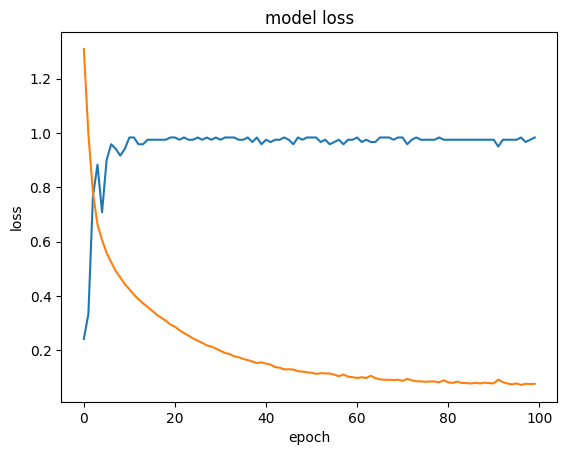

In [ ]:
plt.plot(output_fit.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(output_fit.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
output_predict = model.predict(xtest , batch_size=128)
print(ytrain[0:10])
print(output_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[6.9199182e-04 9.6779394e-01 3.1514168e-02]
 [9.9882025e-01 1.1797054e-03 6.3779208e-12]
 [4.2081258e-09 4.9697200e-04 9.9950296e-01]
 [7.2746439e-04 9.3828213e-01 6.0990393e-02]
 [4.3603010e-04 9.7715956e-01 2.2404460e-02]
 [9.9778908e-01 2.2109963e-03 6.6354269e-11]
 [7.9553677e-03 9.9114984e-01 8.9490204e-04]
 [2.1691530e-05 1.5928802e-01 8.4069031e-01]
 [2.4015905e-04 5.1758206e-01 4.8217779e-01]
 [2.3469045e-03 9.9545741e-01 2.1957532e-03]
 [7.8521931e-05 3.7074527e-01 6.2917620e-01]
 [9.9696547e-01 3.0345242e-03 2.6945002e-10]
 [9.9907768e-01 9.2228211e-04 7.2873313e-12]
 [9.9702156e-01 2.9783126e-03 1.9043617e-10]
 [9.9876797e-01 1.2320988e-03 1.3163187e-11]
 [6.3368236e-04 9.7878903e-01 2.0577218e-02]
 [1.3604490e-07 2.4639934e-03 9.9753582e-01]
 [2.3346557e-03 9.9222535e-01 5.4400503e-03]
 [8.6879951e-04 9.3083423e-01 

In [ ]:
output_evaluate= model.evaluate(xtest , ytest, batch_size=10)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0896  


In [ ]:

predicted_classes = np.argmax(model.predict(xtest, batch_size=64), axis=-1)
print(predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
